In [11]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
df1 = pd.read_csv('../data/2018/Earning2018.csv',header= None)
df2 = pd.read_csv('../data/2018/employePopn2018.csv',header= None)
df3 = pd.read_csv('../data/2018/workinghr2018.csv',header= None)






In [13]:
# I encountered several errors regarding header 'occupation' so i implemented this code as final solution 
df1.columns = df1.iloc[0]
df1 = df1.drop(0).reset_index(drop=True)
df1 = df1.rename(columns={df1.columns[0]: "Occupation"})  # Ensure first column is named "Occupation"

# Repeat for df2 and df3
df2.columns = df2.iloc[0]
df2 = df2.drop(0).reset_index(drop=True)
df2 = df2.rename(columns={df2.columns[0]: "Occupation"})

df3.columns = df3.iloc[0]
df3 = df3.drop(0).reset_index(drop=True)
df3 = df3.rename(columns={df3.columns[0]: "Occupation"})

# Merge
merged_df = df1.merge(df2, on="Occupation", how="outer") \
               .merge(df3, on="Occupation", how="outer")
#rename the columns for ease
merged_df.columns = ['Occupation', 'total_ear', 'male_ear', 'female_ear',
                        'total_pop', 'male_pop', 'female_pop',
                        'total_wor', 'male_wor', 'female_wor']

In [14]:
print(merged_df.columns.tolist())
print(merged_df["Occupation"].tolist())

['Occupation', 'total_ear', 'male_ear', 'female_ear', 'total_pop', 'male_pop', 'female_pop', 'total_wor', 'male_wor', 'female_wor']
['Agriculture workers', 'Armed forces', 'Clerks', 'Craft & related trades', 'Elementary occupations', 'Legislators senior officials', 'Plant & machine operators', 'Professionals', 'Service workers', 'Technicians', 'Total']


In [15]:
merged_df

,Occupation,total_ear,male_ear,female_ear,total_pop,male_pop,female_pop,total_wor,male_wor,female_wor
0,Agriculture workers,13640,12816,13259,20.1,17.6,23.7,37,32,34
1,Armed forces,NaN,NaN,NaN,0.1,0.2,0.0,NaN,NaN,NaN
2,Clerks,17021,14948,16161,1.2,2.1,0.4,43,42,43
3,Craft & related trades,21803,15686,21456,13.8,18.3,8.2,51,35,47
4,Elementary occupations,15033,11388,13622,20.2,23.4,16.1,48,40,45
5,Legislators senior officials,34162,29342,33245,0.7,1.3,0.2,48,49,48
6,Plant & machine operators,17578,9401,17404,1.9,3.6,0.3,54,37,53
7,Professionals,25684,14742,21065,2.1,3.5,0.9,41,40,41
8,Service workers,15194,10580,14125,23.8,27.1,19.5,51,43,47
9,Technicians,26494,21838,24856,2.4,3.2,1.6,44,42,44


In [16]:
merged_df['total_ear'][0]

'13640'

In [26]:



mainScalar = StandardScaler()
col_to_normalize = ['total_ear', 'male_ear', 'female_ear', 'total_pop', 'male_pop', 'female_pop', 'total_wor', 'male_wor', 'female_wor']
# for col in col_to_normalize:
#     merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')
normalized_df = merged_df
mainScalar.fit(merged_df[col_to_normalize])
normalized_df[col_to_normalize]= mainScalar.fit_transform(merged_df[col_to_normalize])

radar_df = normalized_df


In [31]:
mainScalar.mean_

array([ 2.77555756e-18, -4.44089210e-17, -5.55111512e-18, -4.03717464e-17,
        4.03717464e-17,  4.03717464e-17,  1.11022302e-17,  0.00000000e+00,
       -1.66533454e-17])

In [18]:
radar_df

,Occupation,total_ear,male_ear,female_ear,total_pop,male_pop,female_pop,total_wor,male_wor,female_wor
0,Agriculture workers,-1.133455,-0.462153,-1.029596,0.114284,-0.022146,0.291679,-1.929158,-1.780345,-2.247701
1,Armed forces,NaN,NaN,NaN,-0.608200,-0.654790,-0.555099,NaN,NaN,NaN
2,Clerks,-0.583427,-0.086238,-0.535011,-0.568463,-0.585708,-0.540808,-0.710742,0.473256,-0.339276
3,Craft & related trades,0.194519,0.043886,0.367411,-0.113299,0.003305,-0.262121,0.913812,-1.104265,0.508913
4,Elementary occupations,-0.906839,-0.713938,-0.967730,0.117896,0.188736,0.020138,0.304604,0.022536,0.084819
5,Legislators senior officials,2.205107,2.451715,2.376598,-0.586525,-0.614796,-0.547953,0.304604,2.050777,0.720961
6,Plant & machine operators,-0.492813,-1.064287,-0.323167,-0.543176,-0.531170,-0.544380,1.523019,-0.653544,1.781197
7,Professionals,0.825888,-0.122560,0.300773,-0.535951,-0.534806,-0.522943,-1.116881,0.022536,-0.763370
8,Service workers,-0.880647,-0.856405,-0.882004,0.247943,0.323263,0.141617,0.913812,0.698616,0.508913
9,Technicians,0.957661,1.128608,0.946869,-0.525114,-0.545714,-0.497933,-0.507673,0.473256,-0.127228


In [19]:
print(radar_df.columns.tolist())

['Occupation', 'total_ear', 'male_ear', 'female_ear', 'total_pop', 'male_pop', 'female_pop', 'total_wor', 'male_wor', 'female_wor']


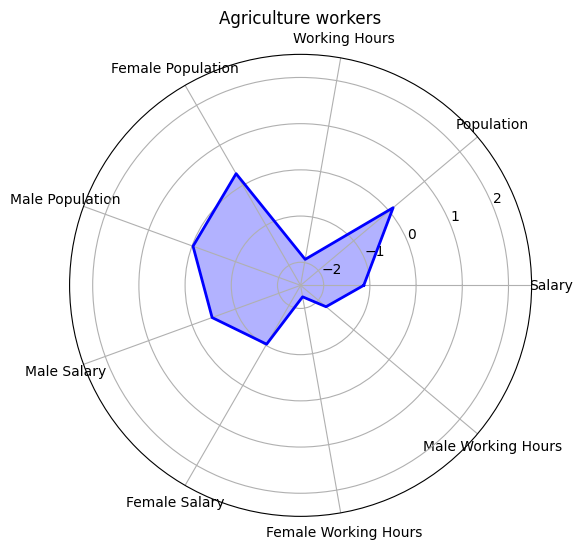

In [20]:
# Sample Data (values for each attribute)
labels = ["Salary","Population","Working Hours","Female Population","Male Population","Male Salary","Female Salary","Female Working Hours","Male Working Hours"]
row = 0
values = [radar_df['total_ear'][row], radar_df['total_pop'][row], radar_df['total_wor'][row], radar_df['female_pop'][row], radar_df['male_pop'][row],radar_df['male_ear'][row],radar_df['female_ear'][row],radar_df['female_wor'][row],radar_df['male_wor'][row]]  # Scores out of 110

# Convert to radians for the radar chart
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()

# Close the shape by repeating first value
values += values[:1]
angles += angles[:1]

# Plot radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='blue', alpha=0.3)  # Fill area
ax.plot(angles, values, color='blue', linewidth=2)  # Border line
ax.set_xticks(angles[:-1])
ax.set_ylim(-2.5, 2.5)
ax.set_xticklabels(labels)

# Show the plot
plt.title(radar_df['Occupation'][row])
plt.show()
